# reproduction of the Multilayer Film from the book "Photonic Crystals: Molding the Flow of Light"

In [14]:
#import meep as mp
from meep import mpb
import matplotlib.pyplot as plt

### First you define the geometry and other nedeed objects and you call the mode solver 

In [39]:
num_bands = 8
resolution = 32


geometry_lattice = mp.Lattice(size=mp.Vector3(1))
geometry = [
    mp.Block(mp.Vector3(0.5,mp.inf, mp.inf),  material=mp.Medium(epsilon=13))]

k_points = [mp.Vector3(), mp.Vector3(0.5)]

k_points = mp.interpolate(16, k_points)

ms = mpb.ModeSolver(
    geometry=geometry,
    default_material=mp.Medium(epsilon=1),
    geometry_lattice=geometry_lattice,
    k_points=k_points,
    resolution=resolution,
    num_bands=num_bands
)

### Then you run the simulation (in 1D TM modes and TE modes are the same )

In [ ]:
ms.run_tm()
freqs = ms.all_freqs
gaps = ms.gap_list

### You plot epsilon to make sure that you are sumilating the right system

epsilon: 1-13, mean 7, harm. mean 1.94652, 53.125% > 1, 50% "fill"


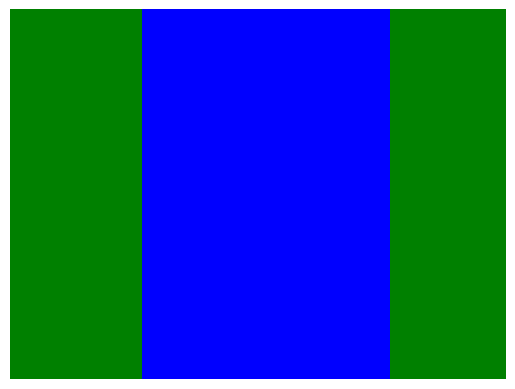

In [46]:
eps = ms.get_epsilon()
cmap = plt.cm.colors.ListedColormap(['green', 'blue'])
bounds = [0, 6, 13]
norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)
plt.imshow([eps], interpolation='spline36', cmap= cmap, aspect='auto' )
plt.axis('off')
plt.show()

### plot the band structure

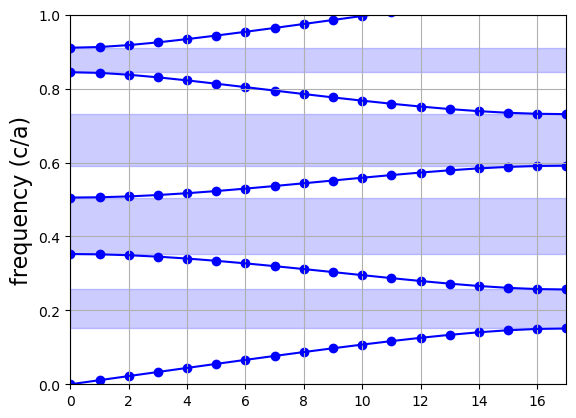

In [47]:
fig, ax = plt.subplots()
x = range(len(freqs))
for xz, tz, in zip(x, freqs):
    ax.scatter([xz]*len(tz), tz, color='blue')
ax.plot(freqs, color='blue')
ax.set_ylim([0, 1])
ax.set_xlim([x[0], x[-1]])

# Plot gaps
for gap in gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='blue', alpha=0.2)


ax.set_ylabel('frequency (c/a)', size=16)
ax.grid(True)
plt.show()
